# MNIST Prediction with Keras and TensorFlow

- MNIST dataset: is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. More info can be found at the [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
- Goal: build a simple artificial neural network to predict the digit in the images.

### 1. Import libraries

In [81]:
# for training the model
from keras import datasets, models, layers, utils

# for linear algebra
import numpy as np

# for plotting data, loss, accuracy
import matplotlib.pyplot as plt

# for type hinting
from typing import Optional

### 2. Utils functions

In [82]:
def plot_data(
    X: np.ndarray, y: np.ndarray, y_proba: Optional[np.ndarray] = None
) -> None:
    nrows, ncols = 2, 4
    _, axes = plt.subplots(nrows, ncols, figsize=(8, 4))

    len_x = X.shape[0]
    for idx in range(nrows * ncols):
        ax = axes[idx // ncols, idx % ncols]

        img_idx = np.random.randint(0, len_x)

        ax.imshow(X[img_idx], cmap="gray")
        ax.set(xticks=[], yticks=[])

        true_label = f"True: {y[img_idx]}"
        color = "black"

        if y_proba is not None:
            pred_label = f"Pred: {y_proba[img_idx]}"
            color = "green" if y[img_idx] == y_proba[img_idx] else "red"

        img_title = true_label if y_proba is None else f"{true_label}\n{pred_label}"
        ax.set_xlabel(img_title, color=color)

    plt.tight_layout()
    plt.show()

### 3. Load and preprocess data

- Load the MNIST dataset
- Preprocess the data

In [83]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

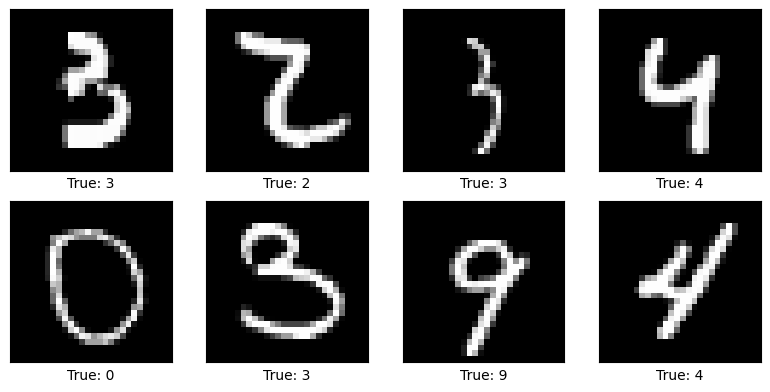

In [84]:
plot_data(X_train, y_train)

In [85]:
# Convert to float32 and scale to [0, 1]
X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0

In [86]:
# Add channel dimension
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [87]:
print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [88]:
# Convert class vectors to one-hot encoded
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [89]:
print("y_train shape:", y_train.shape)
print(y_train.shape[0], "train samples")
print(y_test.shape[0], "test samples")

y_train shape: (60000, 10)
60000 train samples
10000 test samples


### 4. Train the model

In [90]:
model = models.Sequential(
    [
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics="accuracy")

In [92]:
batch_size = 128
epochs = 10

history = model.fit(
    X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1
)

Epoch 1/10
 26/422 [>.............................] - ETA: 0s - loss: 1.4770 - accuracy: 0.5429  

422/422 [==============================] - 1s 2ms/step - loss: 0.4430 - accuracy: 0.8686 - val_loss: 0.1006 - val_accuracy: 0.9725
Epoch 2/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0915 - accuracy: 0.9719 - val_loss: 0.0871 - val_accuracy: 0.9742
Epoch 3/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0538 - accuracy: 0.9832 - val_loss: 0.0845 - val_accuracy: 0.9757
Epoch 4/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0358 - accuracy: 0.9883 - val_loss: 0.0656 - val_accuracy: 0.9817
Epoch 5/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0250 - accuracy: 0.9918 - val_loss: 0.0796 - val_accuracy: 0.9782
Epoch 6/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0215 - accuracy: 0.9933 - val_loss: 0.0831 - val_accuracy: 0.9782
Epoch 7/10
422/422 [==============================] - 1s 2ms/step - loss: 0.0152 - accuracy: 0.9953 - val_loss: 0.0700 - val_accuracy: 0.9845
Epoch 8/10
422/42

### 5. Evaluate the model

In [93]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [94]:
train_loss, val_loss = history_dict["loss"], history_dict["val_loss"]
train_acc, val_acc = history_dict["accuracy"], history_dict["val_accuracy"]

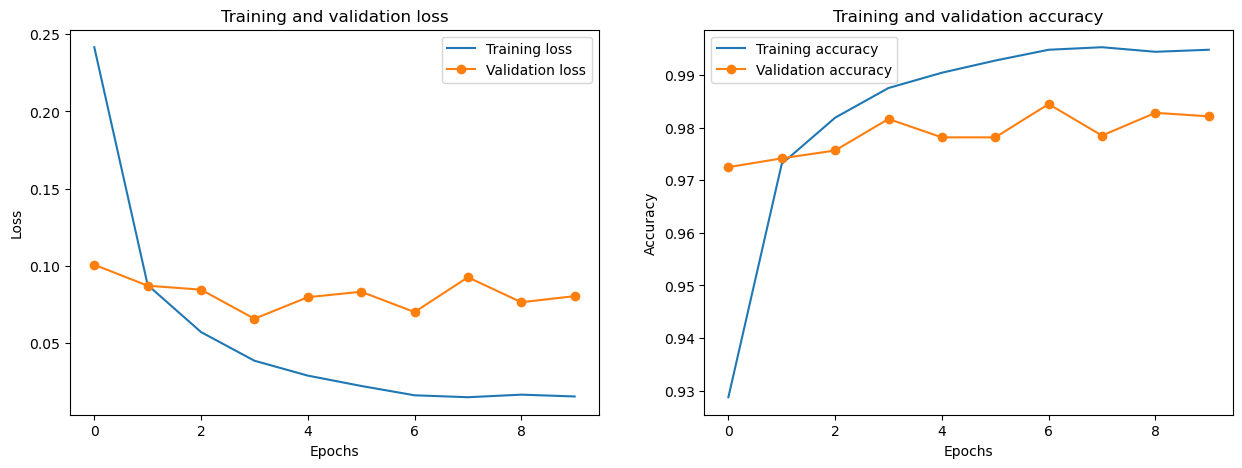

In [95]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
epochs_run = [i for i in range(epochs)]

ax1.plot(epochs_run, train_loss, label="Training loss")
ax1.plot(epochs_run, val_loss, label="Validation loss", marker="o")

ax1.set_title("Training and validation loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epochs_run, train_acc, label="Training accuracy")
ax2.plot(epochs_run, val_acc, label="Validation accuracy", marker="o")

ax2.set_title("Training and validation accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()

plt.show()

### 6. Predict the test set

In [96]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0829540565609932
Test accuracy: 0.978600025177002


In [97]:
y_pred = model.predict(X_test)

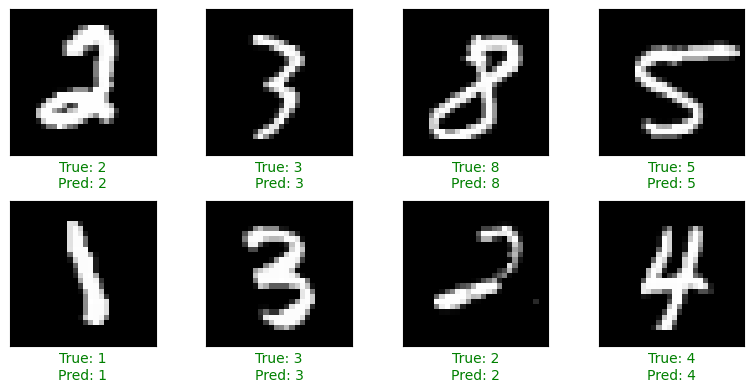

In [98]:
plot_data(X_test, np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))